In [1]:
import sys
sys.path.append('/home/jovyan/workspace')

Fitted 1 variables to the figure.
HandleNaN{Operation_uwop=multiply{Filter{Quantiles_ntiles=2{Normalise{Component_component=mag{Gradient{Projection{Component_component=rad{Operation_uwop=multiply{Region{Operation_uwop=pow{Variable_varName=temperature{};Constant_val=arr{[ 2.]}{}};Shape_varName=anon{}};Variable_varName=velocity{}}}}}};Constant_val=arr{[ 0.  1.]}{}}};Constant_val=arr{[ 1.]}{}};Vanilla_varName=viscosity{Variable_varName=temperature{}}};Constant_val=arr{[ 0.]}{}}



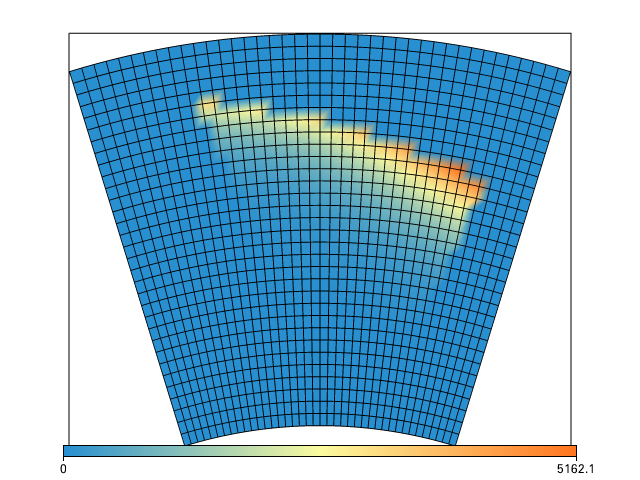

[[ 292.13218795]]


In [12]:
import planetengine
from planetengine import functions as pfn
import numpy as np

system = planetengine.systems.arrhenius.build(res = 32)
initials = {'temperatureField': planetengine.initials.sinusoidal.IC(freq = 1.)}
planetengine.initials.apply(
    initials,
    system,
    )
system.solve()

variable1 = pfn.convert(system.velocityField, 'velocity')
variable2 = pfn.convert(system.temperatureField, 'temperature')
constant = pfn.convert(2.)
shape = pfn.convert(np.array([[0.2, 0.1], [0.9, 0.3], [0.8, 0.7], [0.4, 0.9]]))
vanilla = pfn.convert(system.viscosityFn, 'viscosity')

var = variable2
var = var ** constant
var = pfn.Region(var, shape)
var = var * variable1
var = pfn.Component.rad(var)
var = pfn.Gradient.mag(var)
var = pfn.Normalise(var, [0., 1.])
var = pfn.Quantiles.median(var)
var = pfn.Filter(var, 1.)
var = var * vanilla
var = pfn.HandleNaN.zero(var)

planetengine.quickShow(var.mesh, var)

red = pfn.Integral(var)

print(red.evaluate())